In [240]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
import numpy as np
from matplotlib import pyplot as plt

In [241]:
train_X = pd.read_csv('../data/curated/final_train_X.csv')
train_Y = pd.read_csv('../data/curated/train_Y.csv')
val_X = pd.read_csv('../data/curated/final_val_X.csv')
val_Y = pd.read_csv('../data/curated/val_Y.csv')
test_X = pd.read_csv('../data/curated/final_test_X.csv')

In [264]:
clf = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights= 'uniform')

In [265]:
clf.fit(X=train_X, y=train_Y)

/Users/devin/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [266]:
accuracy_score(y_pred=clf.predict(val_X), y_true=val_Y)

0.8268156424581006

In [267]:
prediction = clf.predict(test_X)

In [268]:
raw_test_data = pd.read_csv('../data/raw/test.csv')

In [269]:
knn_pred = pd.DataFrame({
    'PassengerId': raw_test_data['PassengerId'],
    'Survived': prediction
})

In [270]:
knn_pred.to_csv('../data/curated/knn_pred.csv', index=False)

In [271]:
importance = permutation_importance(clf, val_X, val_Y, scoring='accuracy', n_repeats=10, random_state=42)

In [272]:
sorted_index = importance.importances_mean.argsort()

In [273]:
sorted_index

array([ 5, 82, 83, 81, 68, 20, 42, 59, 58, 57, 56, 55, 54, 51, 52, 60, 50,
       49, 48, 47, 46, 45, 53, 61, 64, 63, 80, 79, 78, 77, 76, 74, 73, 72,
       71, 70, 69, 67, 66, 65, 44, 62, 43, 85, 41, 12, 13, 14, 15, 16, 17,
       18, 84, 22, 25, 26, 27, 21, 29, 40, 28, 38, 37, 36, 35, 34, 39, 33,
       32, 31, 30,  7,  8, 10, 75,  9, 24,  2, 11,  4,  1, 19,  3, 23,  0,
        6])

In [274]:
importance.importances_mean

array([ 0.02513966,  0.01564246,  0.00837989,  0.01843575,  0.01061453,
       -0.00391061,  0.03240223,  0.00055866,  0.00055866,  0.00614525,
        0.00502793,  0.00949721,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.01564246,
       -0.00055866,  0.        ,  0.        ,  0.01955307,  0.00614525,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.00055866,  0.  

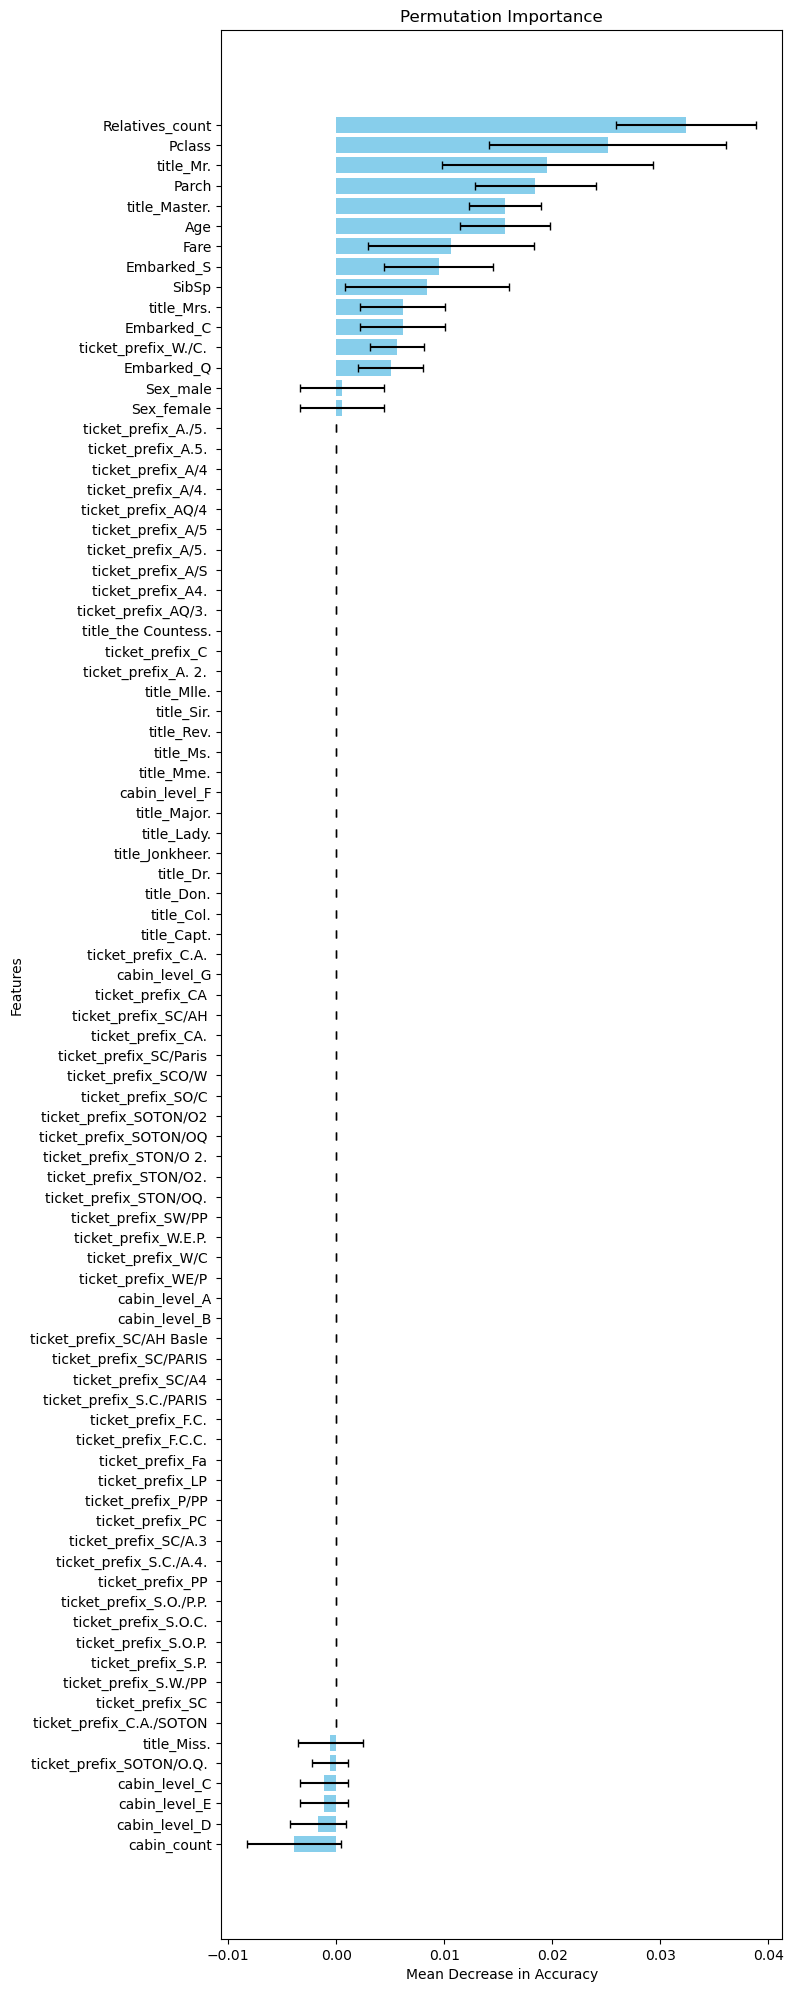

In [275]:
plt.figure(figsize=(8,20))
plt.barh(y=range(len(sorted_index)),
        width=importance.importances_mean[sorted_index],
        xerr=importance.importances_std[sorted_index],
        color='skyblue',
        align='center',
        ecolor='black',
        capsize=3)
plt.yticks(ticks=range(len(sorted_index)), labels=np.array(train_X.columns)[sorted_index])
plt.xlabel('Mean Decrease in Accuracy')
plt.ylabel('Features')
plt.title('Permutation Importance')
plt.tight_layout(pad=1.0)
plt.show()

### drop zero importance featrues

In [284]:
zero_importance_features = [train_X.columns[i] for i in range(len(train_X.columns)) if importance.importances_mean[i] <= 0]

In [285]:
len(zero_importance_features)

71

In [286]:
len(train_X.columns)

86

In [287]:
dropped_train_X = train_X.drop(columns=zero_importance_features)
dropped_val_X = val_X.drop(columns=zero_importance_features)
dropped_test_X = test_X.drop(columns=zero_importance_features)

In [288]:
droppped_clf = KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [289]:
droppped_clf.fit(X=dropped_train_X, y=train_Y)

/Users/devin/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=17)

In [290]:
accuracy_score(y_pred=droppped_clf.predict(dropped_val_X), y_true=val_Y)

0.8268156424581006

In [291]:
dropped_prediction = droppped_clf.predict(dropped_test_X)

In [292]:
dropped_knn_pred = pd.DataFrame({
    'PassengerId': raw_test_data['PassengerId'],
    'Survived': dropped_prediction
})

In [293]:
dropped_knn_pred.to_csv('../data/curated/dropped_knn_pred.csv', index=False)